In [622]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [623]:
data = pd.read_csv('letter-recognition.csv')

In [624]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [625]:
data.shape

(20000, 17)

In [626]:
data.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [627]:
data.duplicated().sum()

np.int64(1332)

In [628]:
data = data.drop_duplicates()

In [629]:
data.duplicated().sum()

np.int64(0)

In [630]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18668 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  18668 non-null  object
 1   xbox    18668 non-null  int64 
 2   ybox    18668 non-null  int64 
 3   width   18668 non-null  int64 
 4   height  18668 non-null  int64 
 5   onpix   18668 non-null  int64 
 6   xbar    18668 non-null  int64 
 7   ybar    18668 non-null  int64 
 8   x2bar   18668 non-null  int64 
 9   y2bar   18668 non-null  int64 
 10  xybar   18668 non-null  int64 
 11  x2ybar  18668 non-null  int64 
 12  xy2bar  18668 non-null  int64 
 13  xedge   18668 non-null  int64 
 14  xedgey  18668 non-null  int64 
 15  yedge   18668 non-null  int64 
 16  yedgex  18668 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [631]:
data.letter.value_counts()

letter
P    782
U    768
D    760
Q    760
A    756
F    752
T    748
Y    746
G    743
R    737
M    732
B    730
S    729
W    726
E    725
O    718
K    718
J    715
C    710
V    706
H    704
N    688
X    678
L    673
Z    640
I    524
Name: count, dtype: int64

<Axes: xlabel='letter', ylabel='count'>

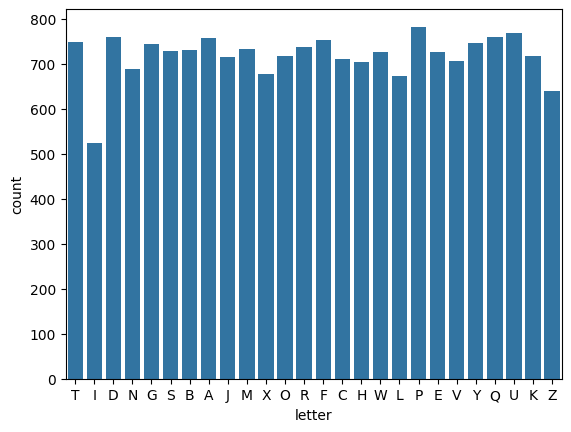

In [632]:
sns.countplot(data, x=data.letter)

16


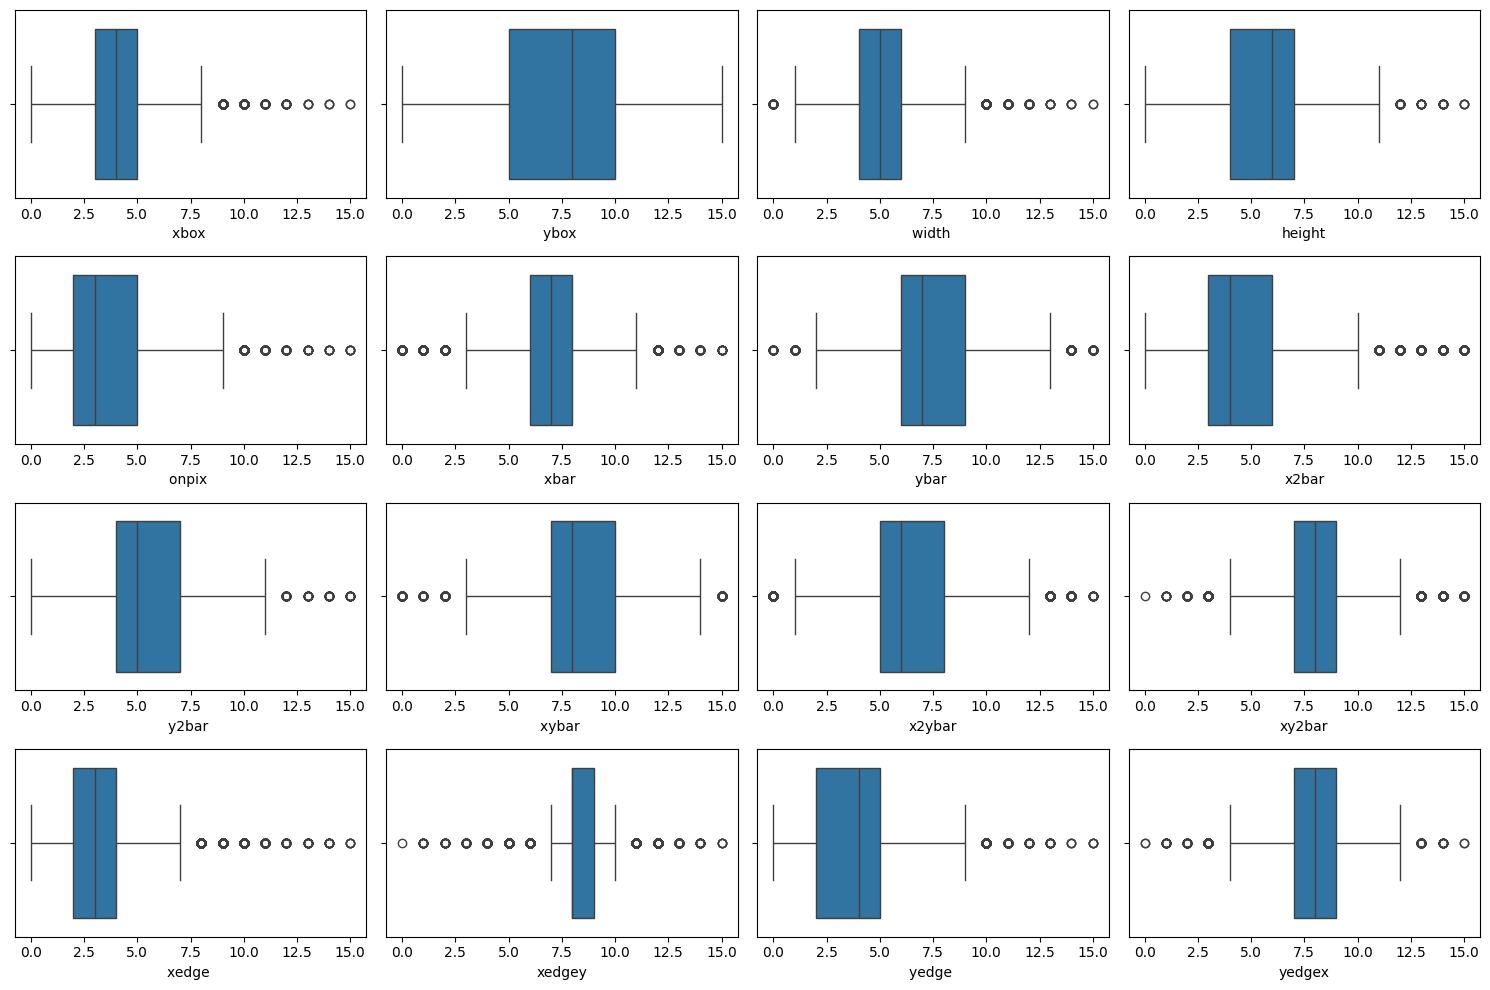

In [633]:
plt.figure(figsize=(15,10))

num_cols = len(data.select_dtypes('number').columns)
print(num_cols)

count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(4, 4, count)
    sns.boxplot(data, x=i)
    count += 1

plt.tight_layout()

In [634]:
data.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [635]:
for i in data.select_dtypes('number').columns:
    li = data[['ybox ']]
    if i not in li:
        data[i] = data[i].clip(lower=data[i].quantile(0.03), upper=data[i].quantile(0.97))

16


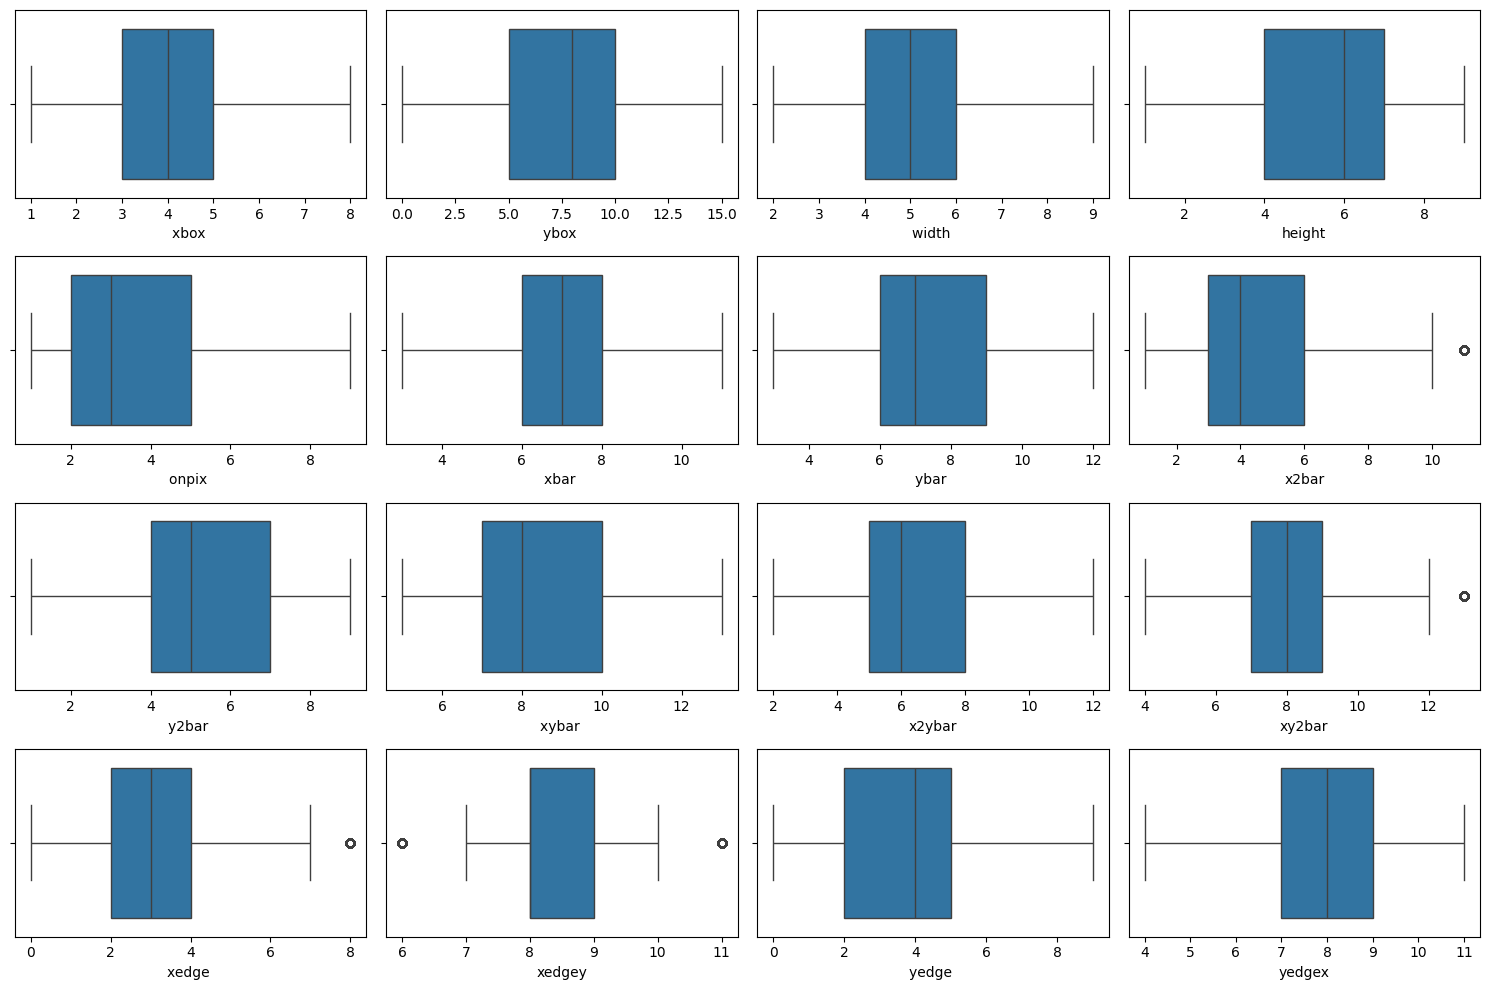

In [636]:
plt.figure(figsize=(15,10))

num_cols = len(data.select_dtypes('number').columns)
print(num_cols)

count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(4, 4, count)
    sns.boxplot(data, x=i)
    count += 1

plt.tight_layout()

In [637]:
for i in data.select_dtypes('number').columns:
    li = data[['x2bar', 'xy2bar', 'xedge ', 'xedgey']]
    if i in li:
        data[i] = data[i].clip(lower=data[i].quantile(0.05), upper=data[i].quantile(0.95))

16


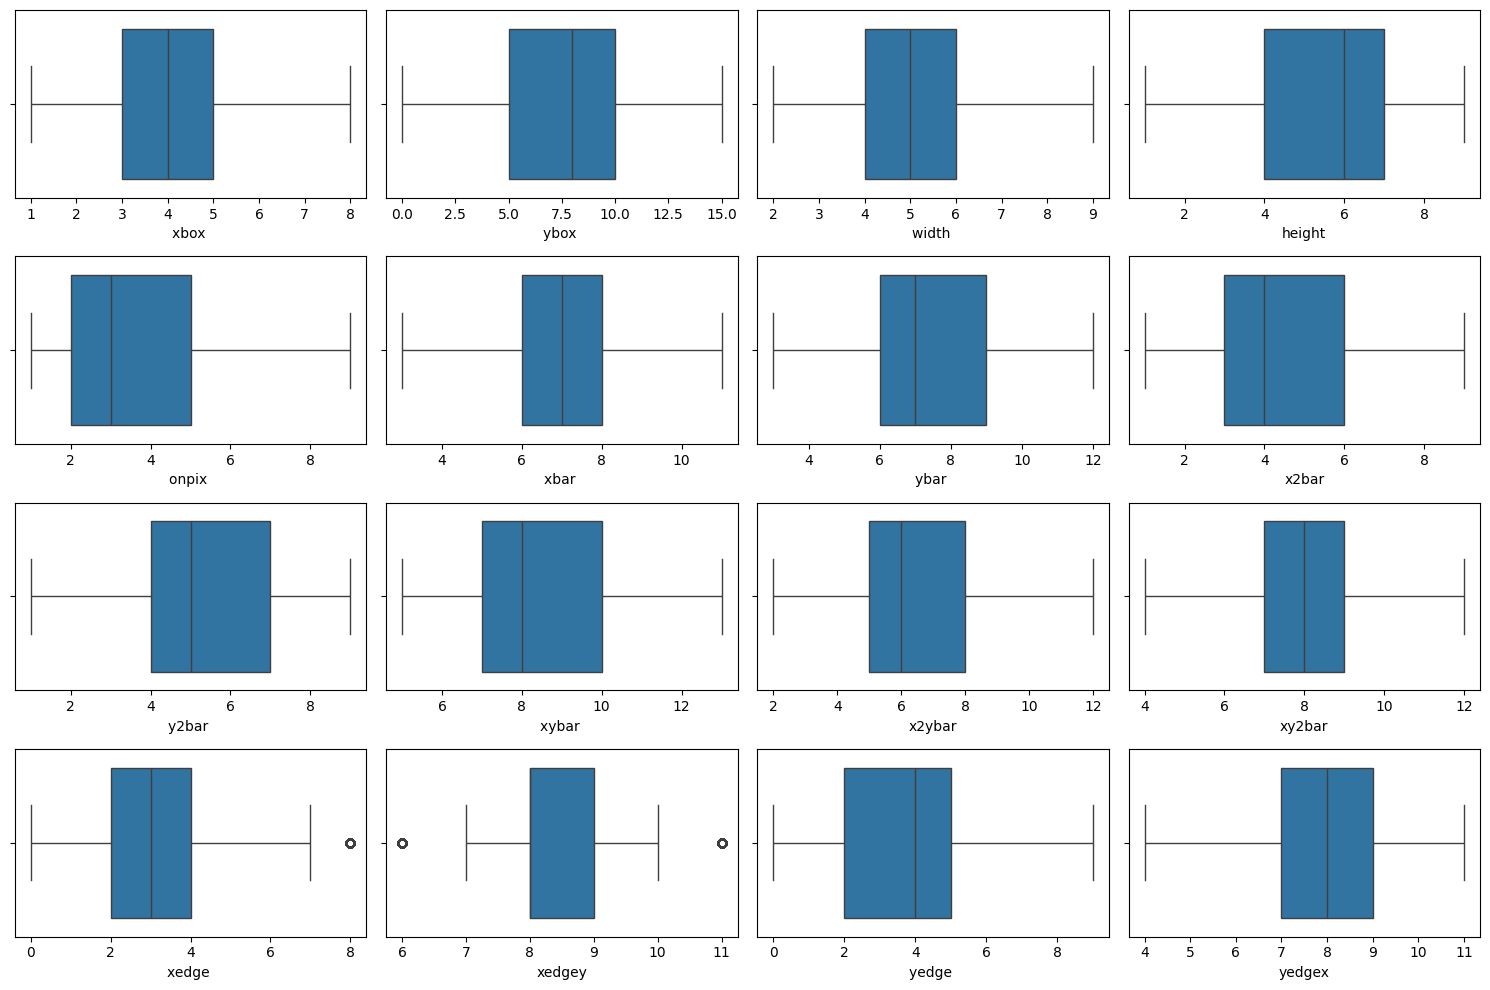

In [638]:
plt.figure(figsize=(15,10))

num_cols = len(data.select_dtypes('number').columns)
print(num_cols)

count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(4, 4, count)
    sns.boxplot(data, x=i)
    count += 1

plt.tight_layout()

In [639]:
for i in data.select_dtypes('number').columns:
    li = data[['xedge ', 'xedgey']]
    if i in li:
        data[i] = data[i].clip(lower=data[i].quantile(0.07), upper=data[i].quantile(0.93))

16


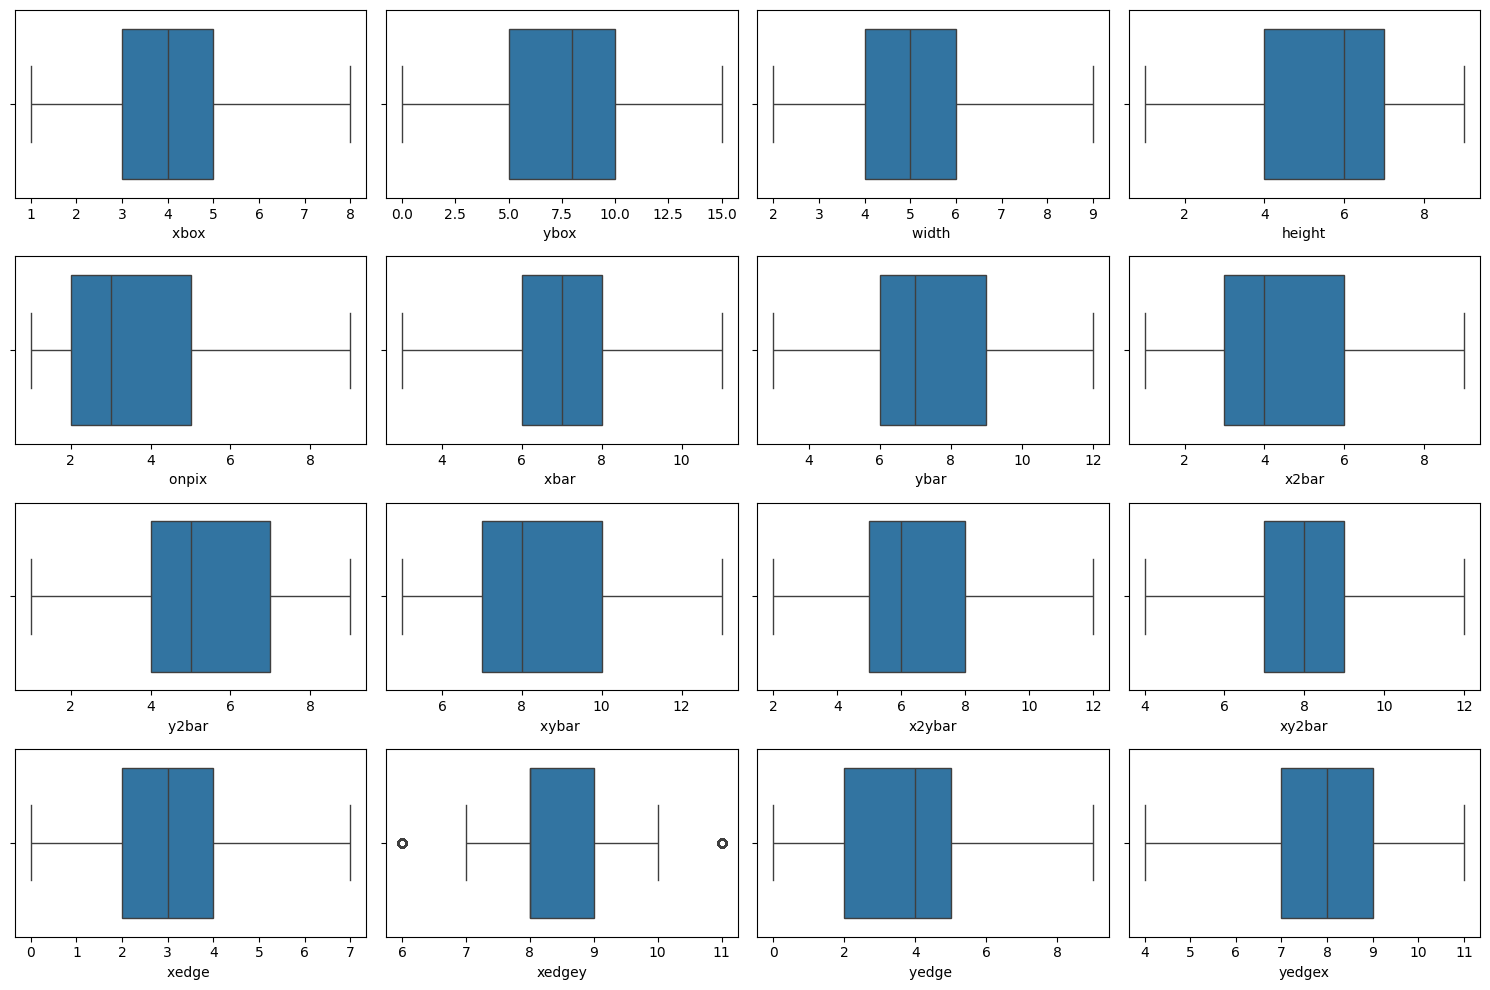

In [640]:
plt.figure(figsize=(15,10))

num_cols = len(data.select_dtypes('number').columns)
print(num_cols)

count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(4, 4, count)
    sns.boxplot(data, x=i)
    count += 1

plt.tight_layout()

In [641]:
for i in data.select_dtypes('number').columns:
    li = data[['xedgey']]
    if i in li:
        data[i] = data[i].clip(lower=data[i].quantile(0.12), upper=data[i].quantile(0.88))

16


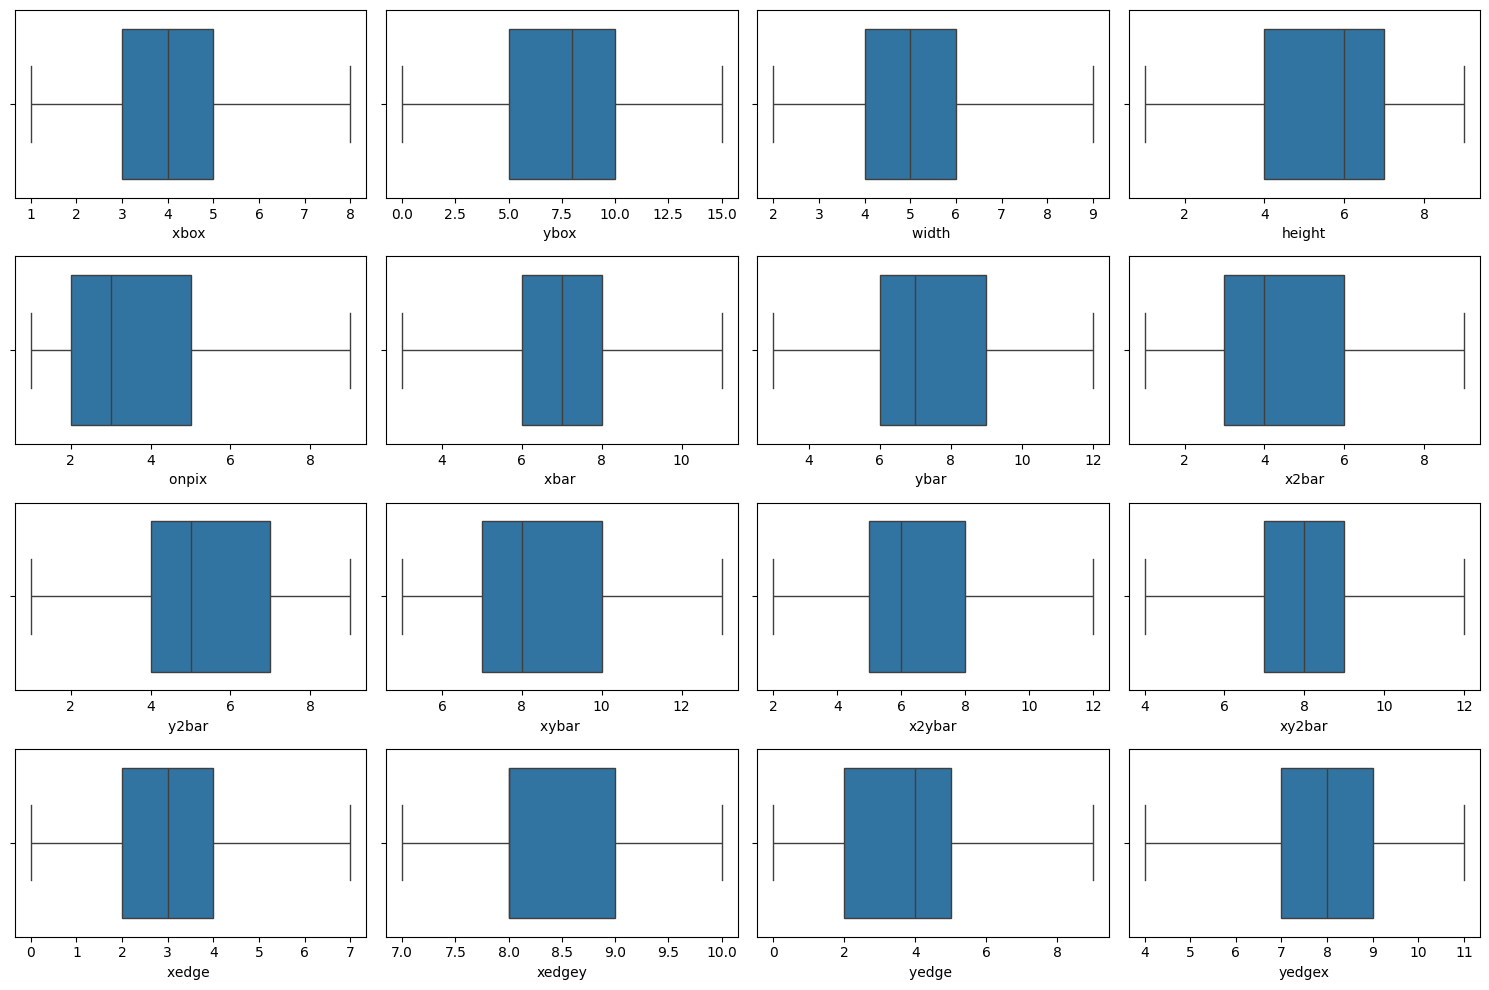

In [642]:
plt.figure(figsize=(15,10))

num_cols = len(data.select_dtypes('number').columns)
print(num_cols)

count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(4, 4, count)
    sns.boxplot(data, x=i)
    count += 1

plt.tight_layout()

In [643]:
x = data.drop(columns=['letter'])
y = data.letter

In [644]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=0)

In [645]:
x_train_v, x_test_v, y_train_v, y_test_v = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [646]:
x_train_v.var(axis=0)

xbox       3.075526
ybox      10.128548
width      3.274385
height     4.338303
onpix      4.102761
xbar       3.426326
ybar       4.540099
x2bar      4.912982
y2bar      4.763298
xybar      5.107484
x2ybar     6.147043
xy2bar     3.710884
xedge      4.133737
xedgey     1.152599
yedge      6.131929
yedgex     2.490615
dtype: float64

In [647]:
from sklearn.svm import SVC
sc = SVC(kernel='poly',degree=3,C=1.0)

In [648]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(x_train_v)

In [649]:
scaled_x_train

array([[0.57142857, 0.6       , 0.57142857, ..., 0.        , 0.11111111,
        0.28571429],
       [0.42857143, 0.46666667, 0.42857143, ..., 0.33333333, 0.33333333,
        0.57142857],
       [0.28571429, 0.46666667, 0.42857143, ..., 0.33333333, 0.66666667,
        0.71428571],
       ...,
       [0.28571429, 0.26666667, 0.57142857, ..., 0.66666667, 0.11111111,
        0.42857143],
       [0.42857143, 0.73333333, 0.42857143, ..., 0.33333333, 1.        ,
        1.        ],
       [0.28571429, 0.33333333, 0.14285714, ..., 1.        , 0.22222222,
        0.14285714]], shape=(14001, 16))

<Figure size 10000x15000 with 0 Axes>

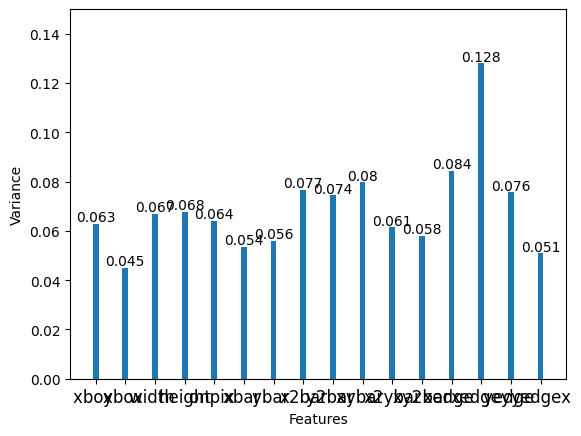

In [650]:
plt.figure(figsize=(100,150))
fig, ax = plt.subplots()

x_value = x_train_v.columns
y_value = scaled_x_train.var(axis=0)

ax.bar(x_value,y_value,width=0.2)
ax.set_xlabel("Features")
ax.set_ylabel("Variance")
ax.set_ylim(0, 0.15)
ax.set_xticks(x_value)
ax.set_xticklabels(x_value, fontsize=12)

for i, v in enumerate(y_value):
    plt.text(x=i, y=v+0.001, s=str(round(v,3)), ha='center')

plt.show()

In [651]:
from sklearn.feature_selection import SelectKBest, chi2


selector = SelectKBest(chi2, k=14)  # pick top 10
X_new = selector.fit_transform(x, y)
sel_col = selector.get_support()  # Boolean mask of selected features
sel_col = sel_col.tolist()
sel_col

[True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [652]:
fil_x = []
for i in range(len(x.columns)):
    if sel_col[i] == True:
        fil_x.append(x.columns[i])

In [653]:
# fil_x = [fil_x]

In [654]:
fil_x

['xbox ',
 'width ',
 'onpix ',
 'xbar ',
 'ybar ',
 'x2bar',
 'y2bar ',
 'xybar ',
 'x2ybar',
 'xy2bar',
 'xedge ',
 'xedgey',
 'yedge ',
 'yedgex']

In [655]:
x_train.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19475,5,9,6,6,2,8,3,6,4,13,9,12,1,7,1,6
9395,4,7,5,5,5,7,7,6,6,7,6,8,6,8,3,8
14724,3,7,5,5,4,7,8,5,8,6,5,9,3,8,6,9
14751,2,1,3,2,2,8,8,6,5,7,5,7,2,8,8,8
219,5,6,6,8,5,8,7,6,3,7,7,12,3,8,6,8


In [656]:
x_train_v = x_train[fil_x]

x_test_v = x_test[fil_x]

In [657]:
x_train.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19475,5,9,6,6,2,8,3,6,4,13,9,12,1,7,1,6
9395,4,7,5,5,5,7,7,6,6,7,6,8,6,8,3,8
14724,3,7,5,5,4,7,8,5,8,6,5,9,3,8,6,9
14751,2,1,3,2,2,8,8,6,5,7,5,7,2,8,8,8
219,5,6,6,8,5,8,7,6,3,7,7,12,3,8,6,8


In [665]:
x_train_v.head()

,xbox,width,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19475,5,6,2,8,3,6,4,13,9,12,1,7,1,6
9395,4,5,5,7,7,6,6,7,6,8,6,8,3,8
14724,3,5,4,7,8,5,8,6,5,9,3,8,6,9
14751,2,3,2,8,8,6,5,7,5,7,2,8,8,8
219,5,6,5,8,7,6,3,7,7,12,3,8,6,8


In [659]:
model = sc.fit(x_train, y_train)
preds = model.predict(x_test)

In [660]:
# All the columns
from sklearn.metrics import f1_score, accuracy_score
f1 = f1_score(y_test,preds, average='weighted')
acc = accuracy_score(y_test, preds)
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy Score: {acc:.2f}")

F1 Score: 0.94
Accuracy Score: 0.94


In [661]:
fil_model = sc.fit(x_train_v, y_train_v)
fil_preds = fil_model.predict(x_test_v)

In [ ]:
# Filtered columns using KBest
from sklearn.metrics import f1_score, accuracy_score
f1 = f1_score(y_test_v,fil_preds, average='weighted')
acc = accuracy_score(y_test_v, fil_preds)
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy Score: {acc:.2f}")

F1 Score: 0.94
Accuracy Score: 0.94


In [664]:
import pickle
pickle.dump(fil_model,open(r'C:\Users\sevug\Desktop\New folder\bigdatahandson\letter_recognition\testing\svm_classifier.pkl','wb'))